# <center> Практическая работа №7.
### <center> Проверка гипотез о законе распределения, проблема нормализации выборки 

In [4]:
#Загрузка основных модулей:
import numpy as np
import scipy. stats as sts
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn
import plotly.graph_objects as go
%matplotlib inline

## Задание 1. ## 
В файле «Data_7_1» приведены массивы результатов
наблюдения нескольких случайных величин. Будем рассматривать каждый из массивов как случайную выборку из генеральной совокупности с
неизвестным законом распределения (для каждого массива генеральная
совокупность своя). Экспортируйте данные. Для каждой из выборок
постройте гистограмму относительных частот и на основе визуального
качественного анализа гистограмм отберите три выборки: выборку А, позволяющую выдвинуть гипотезу о принадлежности нормальному
распределению генеральной совокупности; выборку В, позволяющую
выдвинуть гипотезу о равномерном распределении генеральной совокупности; выборку С, позволяющую выдвинуть гипотезу о показательном распределении генеральной совокупности.

Если среди массивов данных нет ни одного похожего на выборку
из генеральной совокупности с показательным законом распределения,
то попробуйте преобразовать один из них таким образом, чтобы к полу-
ченной выборке гипотеза о показательном распределении генеральной
совокупности подходила.

[<AxesSubplot: title={'center': 'Гистограмма A'}>
 <AxesSubplot: title={'center': 'Гистограмма B'}>
 <AxesSubplot: title={'center': 'Гистограмма C'}>
 <AxesSubplot: title={'center': 'Гистограмма D'}>
 <AxesSubplot: title={'center': 'Гистограмма E'}>]


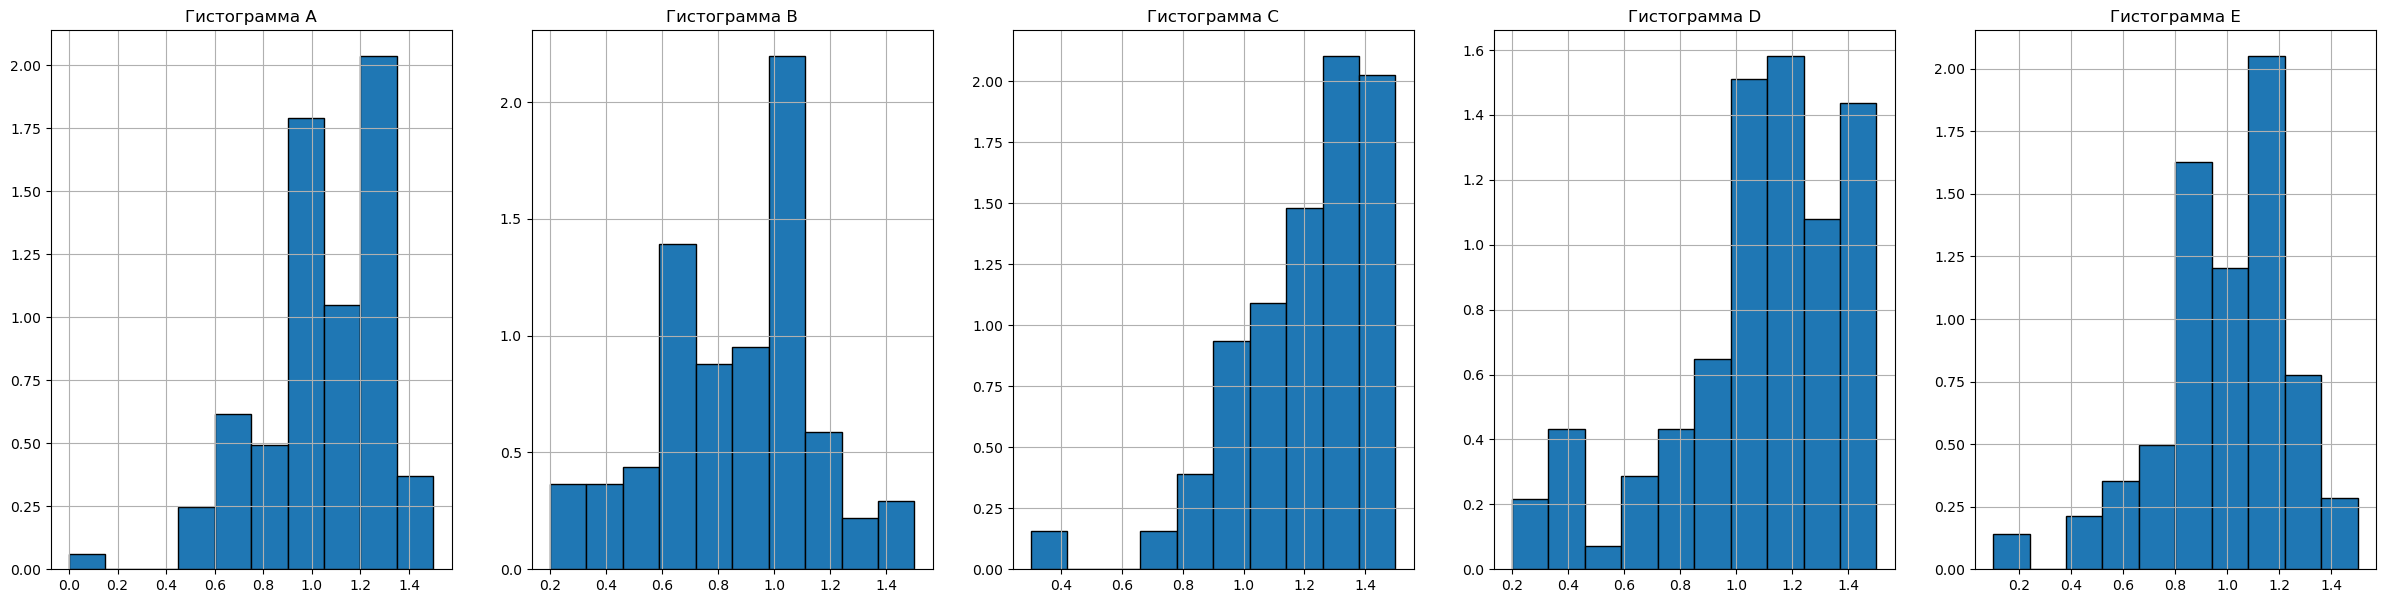

In [9]:
# Чтение данных из Excel файла и назначение имен столбцам
data = pd.read_excel("Data_7_1.xlsx", names=['A', 'B', 'C', 'D', 'E'])

# Список с названием столбцов для построения графиков
selections = ['A', 'B', 'C', 'D', 'E']

# Удаляем первую строку из DataFrame, которая может содержать метаданные или пустые строки
data = data.drop(index=0)

# Игнорирую записи с -
data = data[data != '-']

# Преобразуем оставшиеся данные в тип float для дальнейшего анализа
data = data.astype(float)

fig, ax = plt.subplots(1, 5, figsize=(30, 7))

count = 0

for sel in selections:
    x = ax[count]  
    x.hist(data[sel], edgecolor='black', density=True)  
    x.set_title(f'Гистограмма {sel}')  
    x.grid()  
    count += 1  
print(ax)
plt.show()

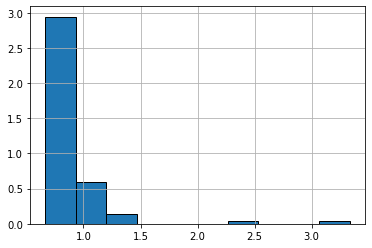

In [14]:
#с помощью преобразования получаем показательное распр из выборки C
d_1_c = 1/(data['C' ])
plt.hist(d_1_c,edgecolor='black', density=True)
plt.grid ()

C - Ex \
B - R \
E -N

## Задание 2. ##
 Проверьте гипотезу о том, что выборка А взята из генеральной совокупности, имеющей нормальное распределение, с помощью критерия согласия хи-квадрат. Решение должно быть подробным, с
выполнением всех шагов алгоритма и отслеживанием корректности
применения. Сделайте выводы.

In [23]:
# Извлечение данных из столбца 'E' и удаление пропущенных значений
A = data['E'].dropna()

# Проведение теста Шапиро-Уилка для проверки нормальности
p = sts.shapiro(A)[1]

# Вычисление среднего значения выборки
m = np.mean(A)

# Вычисление стандартного отклонения выборки с корректировкой на степень свободы
s = np.sqrt(np.var(A, ddof=1))

# Создание нормального распределения 
norm = sts.norm(m, s)

nk, edges = np.histogram(A)

pk = []

n = sum(nk)

# Вычисление вероятностей pk 
for i in range(len(edges) - 2):
    pk.append(norm.cdf(edges[i + 1]) - norm.cdf(edges[i]))

# Обработка последнего интервала
pk.append(1 - norm.cdf(edges[len(edges) - 2]))

# Вычисление ожидаемого количества значений 
npk = [n * pk[i] for i in range(len(edges) - 1)]

names = ["Интервал", "nk", "pk", "npk"]

# Создание таблицы с результатами
table = go.Figure(data=[go.Table(header=dict(values=names), cells=dict(values=[
    list(range(1, len(nk) + 1)), nk, pk, npk
]))])

table.show()

In [24]:
#избавляемся от строк где npk < 5
npk[3]=npk[2]+npk[1]+npk[0]+npk[3]
pk[3]=pk[2]+pk[1]+pk[0]+pk[3]
nk[3]=nk[2]+nk[1]+nk[0]+nk[3]
npk=npk [3:]
pk=pk[3:]

nk=nk [3:]
res=[ ]
for i in range(len(nk)):
    res.append (((nk[i]-npk[i]) ** 2)/npk[i])
names = ["Интервал", "nk", "pk", "npk","((nk - npk) ** 2)/npk"]
table =go. Figure(data=[go. Table(header=dict(values=names), cells=dict(values=[
list(range(1, len(nk)+1)), nk, pk, npk, res]) ) ] )
table.show()

In [18]:
# Суммируем результаты теста, чтобы получить общую статистику
res1 = sum(res)

# Генерируем 1000 значений alpha от 0 до 1
alpha = np.linspace(0, 1, 1000)

# Создание распределения хи-квадрат с n-2-1 степенями свободы
chi2 = sts.chi2(len(nk) - 2 - 1)

# Инициализация пустого списка для хранения индексов
j = []

# Проходим по каждому значению alpha
for i in range(len(alpha)):
    # Если сумма результатов больше или равна квантили хи-квадрат для данного alpha,
    # добавляем индекс в список j
    if res1 >= chi2.ppf(1 - alpha[i]):
        j.append(i)

# Находим минимальный индекс из списка j и соответствующее значение alpha
p = alpha[min(j)]

print('p значение:', p)
print(f'при alpha < {p} принимаем гипотезу')

p значение: 0.005005005005005005
при alpha < 0.005005005005005005 принимаем гипотезу


## Задание 3. ##  
Проверьте гипотезу о том, что выборка С (исходная или
полученная путем преобразования) взята из генеральной совокупности,
имеющей показательное распределение. Используйте критерий согласия
хи-квадрат. Решение должно быть подробным, с выполнением всех шагов алгоритма и отслеживанием корректности применения. Сделайте
выводы.

In [25]:
C = data ['C' ]. dropna ()
C=[max (C) -i for i in C]
m = np.mean (C)
norm = sts.expon(0, m)
hist, edges = np.histogram(C)
nk = [i for i in hist]
pk = []
n = sum (nk)
pk.append (norm.cdf(edges[1]))
for i in range(1, len(edges)-2):
    pk. append (norm.cdf(edges[i + 1]) - norm.cdf (edges[i]) )
pk.append (1 - norm.cdf(edges[len(edges) - 2]))
npk=[n*pk[i] for i in range(len (edges) -1) ]
names = ["Интервал", "nk", "pk", "npk"]
table = go.Figure(data=[go. Table(header=dict(values=names), cells=dict(values=[
list(range(1, len(nk)+1)), nk, pk, npk]))])
table. show()

In [26]:
#избавляемся от строк где пpk<5
npk[5]=npk[5]+npk [6]
pk[5]=pk[5]+pk [6]
nk[5]=nk[5]+nk [6]
npk[7]=npk[7]+npk[8]+npk[9]
pk[7]=pk[7]+pk[8]+pk[9]
nk[7]=nk[7]+nk[8]+nk[9]
del npk[6],pk[6],nk[6],npk[7],pk[7],nk[7],npk[7],pk[7],nk[7]
res=[ ]
for i in range(len(nk)):
    res.append (((nk[i]-npk[i]) ** 2)/npk[i])
names = ["Интервал", "nk", "pk", "npk","((nk - npk) ** 2)/npk"]
table = go. Figure(data=[go.Table(header=dict(values=names), cells=dict(values=[
list(range(1, len(nk)+1)), nk, pk, npk, res]) ) ])
table. show()

In [27]:
#критерий согласия хи-квадрат
res1 = sum (res)
alpha = np. linspace(0,1,1000)
chi2=sts.chi2(len(nk)-2-1)
j=[]
for i in range(len (alpha)):
    if res1>=chi2.ppf(1-alpha[i]):
        j.append(i)
p = alpha[min(j)]
print('p значение:',p)
print (f'при alpha < {p} принимаем гипотезу' )

p значение: 0.06906906906906907
при alpha < 0.06906906906906907 принимаем гипотезу


## Задание 4. ##
1) Преобразуйте данные, применив к выборкам А, В и С преобразование Бокса-Кокса (далее АА, ВВ и СС - преобразованные данные).

2) Постройте гистограммы А и AA, B и BB, С и СС. Сопоставьте
гистограммы прообразов и образов. Результаты прокомментируйте.

3) С помощью критерия Шапиро - Уилка (используйте функцию
shapiro () модуля scipy.stats) проверьте для всех шести выборок гипотезы о том, что выборки принадлежат нормально распределенным генеральным совокупностям. Результаты сопоставьте и прокомментируйте.

4) Для всех шести выборок постройте Q-Q - график. Сопоставьте
графики прообразов и образов. Результаты прокомментируйте и сопоставьте с результатами п. 3).

<Figure size 864x576 with 0 Axes>

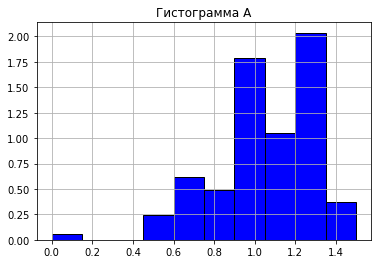

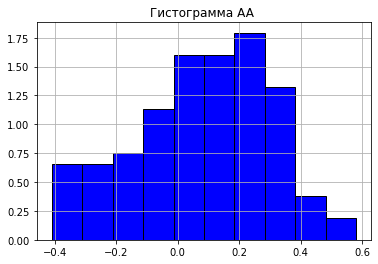

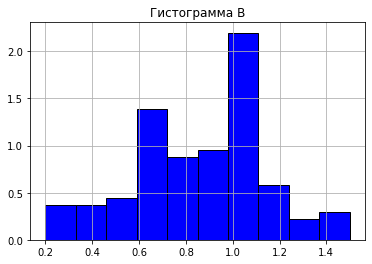

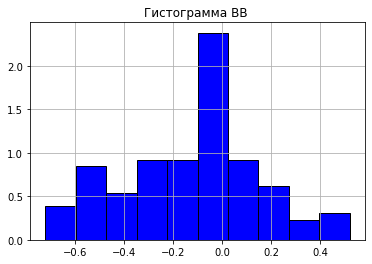

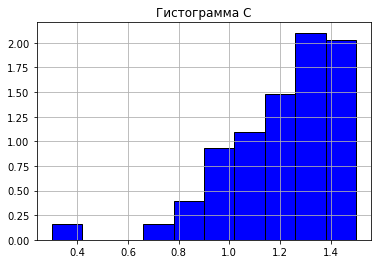

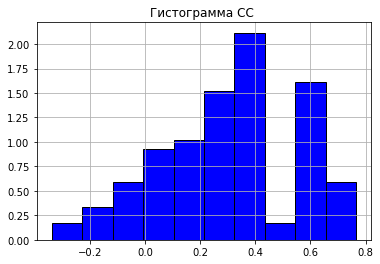

In [29]:
data = pd. read_excel("Data_7_1.ods", names = ['A', 'B', 'C' , 'D' , 'E' ])
selections= ['A', 'B', 'C', 'D', 'E' ]
data = data.drop(index = 0)
data = data[data != '-' ]
data = data.astype(float)

# Построение гистограмм
plt.figure(figsize=[12, 8]) 

# Обработка столбца A
A = data['A'].dropna().values.tolist()
A_positive = [a for a in A if a > 0]  # Фильтрация положительных значений
A_transformed = sts.boxcox(A_positive)  # Преобразование Бокса-Кокса
A_transformed = A_transformed[0]  # Извлечение преобразованных данных

# Обработка столбца B
B = data['B'].dropna().values.tolist()
B_positive = [b for b in B if b > 0]  # Фильтрация положительных значений
B_transformed = sts.boxcox(B_positive)  # Преобразование Бокса-Кокса
B_transformed = B_transformed[0]  # Извлечение преобразованных данных

# Обработка столбца C
C = data['C'].dropna().values.tolist()
C_positive = [c for c in C if c > 0]  # Фильтрация положительных значений
C_transformed = sts.boxcox(C_positive)  # Преобразование Бокса-Кокса
C_transformed = C_transformed[0]  # Извлечение преобразованных данных

plt. figure(figsize=[6,4])
plt.hist(A, edgecolor='black', density=True, color='blue' )
plt.title('Гистограмма А')
plt.grid()
plt. figure(figsize=[6,4])
plt.hist(A_transformed, edgecolor='black', density=True, color='blue')
plt. title('Гистограмма AA ' )
plt.grid()

plt. figure(figsize=[6,4])
plt.hist(B, edgecolor='black', density=True, color='blue' )
plt.title('Гистограмма B')
plt.grid()
plt. figure(figsize=[6,4])
plt.hist(B_transformed, edgecolor='black', density=True, color='blue')
plt. title('Гистограмма BB ' )
plt.grid()

plt. figure(figsize=[6,4])
plt.hist(C, edgecolor='black', density=True, color='blue' )
plt.title('Гистограмма C')
plt.grid()
plt. figure(figsize=[6,4])
plt.hist(C_transformed, edgecolor='black', density=True, color='blue')
plt. title('Гистограмма CC ' )
plt.grid()

p значение для A 0.00017243104230146855
p значение для AA 0.022119315341114998
р значение для B 0.08102016896009445
p значение для BB 0.14273950457572937
р значение для C 3.47754337326478e-07
p значение для CC 0.009985001757740974


Text(0.5, 1.0, 'AA')

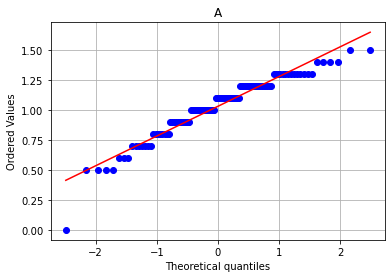

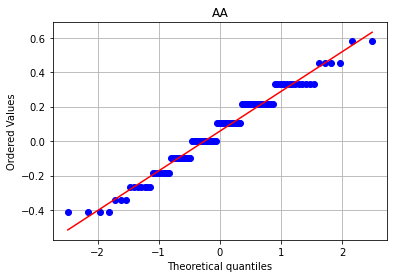

In [30]:
print (f"p значение для A {sts.shapiro(A) [1]}")
print (f"p значение для AA {sts.shapiro(A_transformed) [1]}")
print (f"р значение для B {sts.shapiro(B) [1]}")
print(f"p значение для BB {sts.shapiro(B_transformed) [1]}")
print (f"р значение для C {sts.shapiro(C) [1]}")
print(f"p значение для CC {sts.shapiro(C_transformed) [1]}")
res=sts.probplot (A, plot=plt)
plt.grid(True)
plt.title("A")
plt. figure()
res=sts.probplot (A_transformed, plot=plt)
plt.grid(True)
plt.title("AA")

<Figure size 432x288 with 0 Axes>

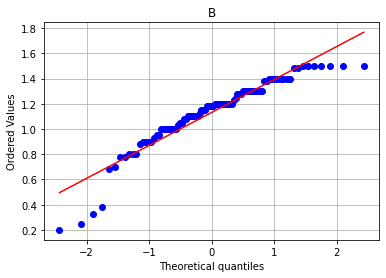

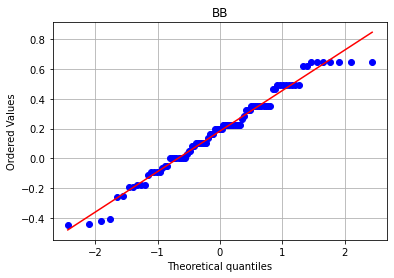

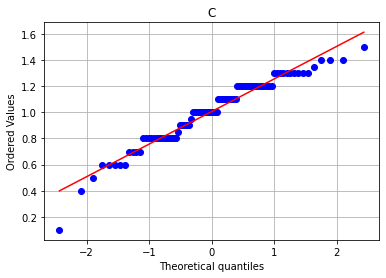

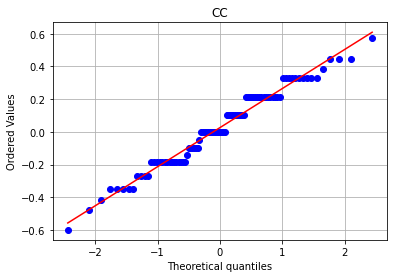

<Figure size 432x288 with 0 Axes>

In [60]:
plt. figure()
res=sts.probplot (B, plot=plt)
plt.grid(True)
plt.title("B")
plt. figure()
res=sts.probplot (B_transformed, plot=plt)
plt.grid(True)
plt. title("BB")
plt. figure()
res=sts.probplot (C, plot=plt)
plt.grid(True)
plt.title("C")
plt. figure()
res=sts.probplot (C_transformed, plot=plt)
plt.grid(True)
plt. title("CC")
plt. figure()